<p style="text-align: center;"><b>DSA312 Data Science with Python</b></p>
<p style="text-align: center;"><b>Group 3: Melvin Yong, Tan Hao Yang, Teo Jun Hao, Isaac Leong, Caleb Ang</b></p>
<p style="text-align: center;"><b>Part 1 of Project</b></p>

For us to finalise what codes are to be placed into this doc. Report writing done here as well

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding dataset

In [3]:
original_df = pd.read_csv("lung cancer survey.csv")

In [13]:
# ydata profiling on original dataset
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(original_df, title="Lung Cancer Dataset Profiling Report", explorative=True)

# Export report as HTML
# profile.to_file("lung_cancer_profile_report.html")

profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Data Cleaning
df_No_NA = original_df.dropna()
final_df = df_No_NA[df_No_NA['AGE'] > 21]

final_df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.0,61.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,59.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,54.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,0.0,54.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,1.0,62.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8997,0.0,71.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8998,1.0,63.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8999,1.0,70.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [15]:
# Clustering method # Do not rerun
from kmodes.kprototypes import KPrototypes

# Define the indices of the numerical and categorical features
cat_cols = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
num_cols = [1]

# Calculate cost for different cluster numbers
costs = []
for num_clusters in range(1, 10): # From 1 to 9
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', n_init=5, verbose=2)
    kproto.fit_predict(df_No_NA, categorical= cat_cols)
    costs.append(kproto.cost_)

# Plot the elbow curve, selection of optimal number of cluster via graphical approach
plt.plot(range(1, 10), costs, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show();

ModuleNotFoundError: No module named 'kmodes'

In [27]:
# Fit K-Prototypes model
# Create the final_df with cluster
from kmodes.kprototypes import KPrototypes

# Define the indices of the numerical and categorical features
cat_cols = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
num_cols = [1]
kproto = KPrototypes(n_clusters=2, init='Cao', verbose=2, random_state=42)
clusters = kproto.fit_predict(df_No_NA, categorical=cat_cols)

final_df = df_No_NA.copy()
# Assign cluster labels to the DataFrame
final_df['cluster'] = clusters

# See how clusters are grouped
age_cluster_summary = final_df.groupby('cluster')['AGE'].agg(['min', 'max'])
print(age_cluster_summary) # We see here, we have grouped cluster = 0 as age 61 to 81, and cluster = 1 as age 44 to 60.

# Invert cluster such that 1: Senior, 0: Middle-aged
final_df['cluster'] = 1 - final_df['cluster']

final_df['cluster'].value_counts() # Each clusters are approximately similarly in number of observation.

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 837, ncost: 586261.3943873475
Run: 1, iteration: 2/100, moves: 369, ncost: 580148.0291794365
Run: 1, iteration: 3/100, moves: 205, ncost: 578297.0209240393
Run: 1, iteration: 4/100, moves: 0, ncost: 578297.0209240393
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 757, ncost: 583992.8070376596
Run: 2, iteration: 2/100, moves: 312, ncost: 579870.6612169943
Run: 2, iteration: 3/100, moves: 189, ncost: 578297.0209240393
Run: 2, iteration: 4/100, moves: 0, ncost: 578297.0209240393
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 515, ncost: 578297.0650739784
Run: 3, iteration: 2/100, moves: 1, ncost: 578297.0209240393
Run: 3, iteration: 3/100, moves: 0, ncost: 578297.0209240393

cluster
1    4612
0    4388
Name: count, dtype: int64

# Smoking

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer Cases by Smoking Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.37893760148457434, 0, '77.89%')

Text(0.42896139901898056, 1, '82.90%')

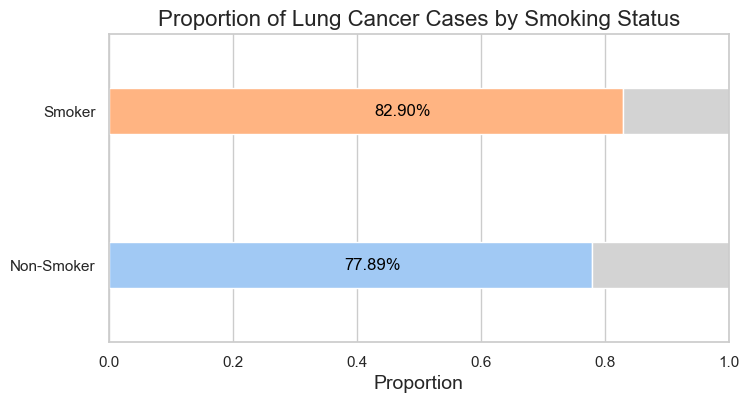

In [5]:
contingency_smoking = pd.crosstab(final_df['SMOKING'], final_df['LUNG_CANCER'])
contingency_smoking['Proportion_Cancer'] = contingency_smoking[1] / (contingency_smoking[0] + contingency_smoking[1])


proportions_smoking = contingency_smoking['Proportion_Cancer']
non_cancer_smoking = 1 - proportions_smoking


plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")
y_labels_smoking = ['Non-Smoker', 'Smoker']
bar_width = 0.3 #change the width for a better fit figure
#create horizontal bar chart for cancer patients who smoke/do not smoke using labels above and sns pastel color palette
bars_lung_cancer_smoking = plt.barh(y_labels_smoking, proportions_smoking, color=sns.color_palette("pastel", 2), height=bar_width)
#create horizontal bar chart for cancer patients who smoke/ do not smoke using labels above and sns pastel color palette
bars_no_cancer_smoking = plt.barh(y_labels_smoking, non_cancer_smoking, color='lightgrey', left=proportions_smoking, height=bar_width)

plt.title('Proportion of Lung Cancer Cases by Smoking Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#to annotate the % of cancer patients for smoker and non-smoker group
for index, value in enumerate(proportions_smoking):
    plt.text(value - 0.4, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

# Yellow Fingers

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer Cases by Presence Of Yellow Fingers')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.31374764595103577, 0, '71.37%')

Text(0.48657407407407405, 1, '88.66%')

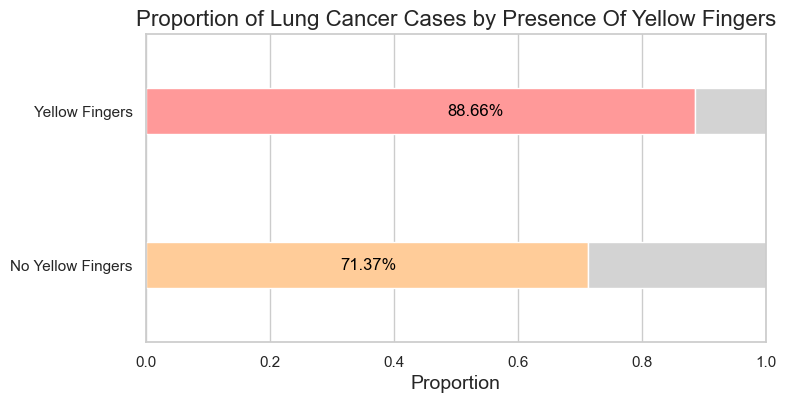

In [7]:
contingency_yellowfingers = pd.crosstab(final_df['YELLOW_FINGERS'], final_df['LUNG_CANCER'])
contingency_yellowfingers['Proportion_Cancer'] = contingency_yellowfingers[1] / (contingency_yellowfingers[0] + contingency_yellowfingers[1])

proportions_yellowfingers = contingency_yellowfingers['Proportion_Cancer']
non_cancer_yellowfingers = 1 - proportions_yellowfingers

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid") 
y_labels_yellowfingers = ['No Yellow Fingers', 'Yellow Fingers']
bar_width = 0.3 
#create horizontal bar chart for cancer patients with or without yellow fingers using labels above and sns pastel color palette
bars_lung_cancer_yellowfingers = plt.barh(y_labels_yellowfingers, proportions_yellowfingers, color=['#FFCC99','#FF9999'], height=bar_width, label='Lung Cancer')
#create horizontal bar chart for non-cancer patients with or without yellow fingers using labels above and sns pastel color palette
bars_no_cancer_yellowfingers = plt.barh(y_labels_yellowfingers, non_cancer_yellowfingers, color='lightgrey', left=proportions_yellowfingers, height=bar_width, label='No Lung Cancer')

plt.title('Proportion of Lung Cancer Cases by Presence Of Yellow Fingers', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for yellow finger and non-yellow finger group
for index, value in enumerate(proportions_yellowfingers):
    plt.text(value - 0.4, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

# Alcohol Consumption

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer Cases by Drinking Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.31374764595103577, 0, '71.37%')

Text(0.48657407407407405, 1, '88.66%')

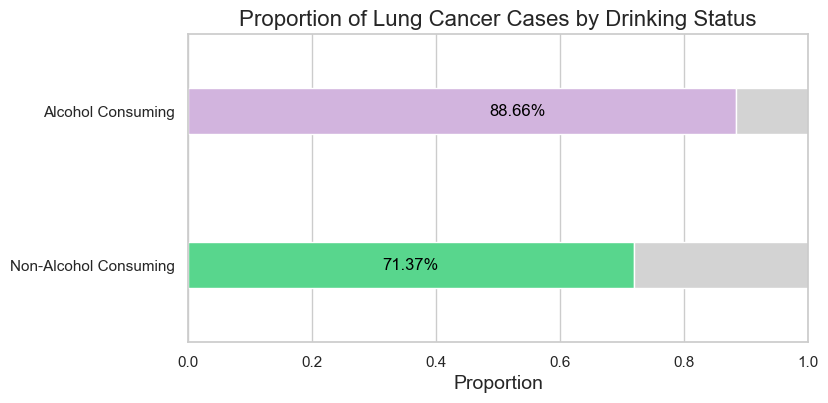

In [9]:
contingency_alcohol = pd.crosstab(final_df['ALCOHOL CONSUMING'], final_df['LUNG_CANCER'])
contingency_alcohol['Proportion_Cancer'] = contingency_alcohol[1] / (contingency_alcohol[0] + contingency_alcohol[1])

proportions_alcohol = contingency_alcohol['Proportion_Cancer']
non_cancer_alcohol = 1 - proportions_alcohol

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid") 
y_labels_alcohol = ['Non-Alcohol Consuming', 'Alcohol Consuming']
bar_width = 0.3 
#create horizontal bar chart for cancer patients who drink/do not drink using labels above and sns pastel color palette
bars_lung_cancer_alcohol = plt.barh(y_labels_alcohol, proportions_alcohol, color=['#58d68d', '#d2b4de'], height=bar_width, label='Lung Cancer')
#create horizontal bar chart for non-cancer patient who drink/do not drink using labels above and sns pastel color palette
bars_no_cancer_alcohol = plt.barh(y_labels_alcohol, proportions_alcohol, color='lightgrey', left=proportions_alcohol, height=bar_width, label='No Lung Cancer')

plt.title('Proportion of Lung Cancer Cases by Drinking Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for drinkers and non-drinkers group
for index, value in enumerate(proportions_yellowfingers):
    plt.text(value - 0.4, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

In [23]:
final_df[['LUNG_CANCER','SMOKING', 'YELLOW_FINGERS', 'ALCOHOL CONSUMING']].corr()

,LUNG_CANCER,SMOKING,YELLOW_FINGERS,ALCOHOL CONSUMING
LUNG_CANCER,1.000000,0.063074,0.217762,0.207659
SMOKING,0.063074,1.000000,0.001875,-0.019939
YELLOW_FINGERS,0.217762,0.001875,1.000000,-0.075707
ALCOHOL CONSUMING,0.207659,-0.019939,-0.075707,1.000000


# Analysis on having multiple lifestyle habits

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer by Lifestyle Factors')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

Text(0.4617808219178082, 0, '44.18%')

Text(0.6070236869207003, 1, '58.70%')

Text(0.8566294067067928, 2, '83.66%')

Text(0.8787921847246892, 3, '85.88%')

Text(0.9015384615384615, 4, '88.15%')

Text(0.9101453957996769, 5, '89.01%')

Text(0.9196509598603839, 6, '89.97%')

Text(0.9259322033898305, 7, '90.59%')

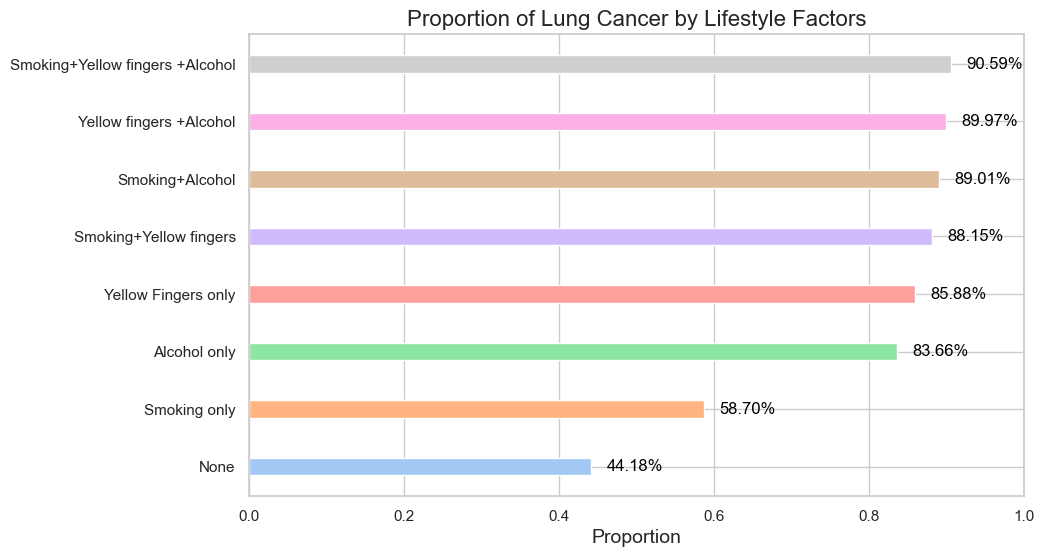

In [13]:
contingency_table_combinations = pd.crosstab([final_df['SMOKING'], final_df['YELLOW_FINGERS'], final_df['ALCOHOL CONSUMING']], final_df['LUNG_CANCER'])
contingency_table_combinations['Proportion_Cancer'] = contingency_table_combinations[1] / (contingency_table_combinations[0] + contingency_table_combinations[1])

contingency_table_combinations.sort_values(by='Proportion_Cancer', inplace=True) 
labels = ['None','Smoking only','Alcohol only','Yellow Fingers only','Smoking+Yellow fingers','Smoking+Alcohol','Yellow fingers +Alcohol','Smoking+Yellow fingers +Alcohol']

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid") 

bar_width = 0.3
bars = plt.barh(labels, contingency_table_combinations['Proportion_Cancer'], color=sns.color_palette("pastel", 8), height=bar_width)

plt.title('Proportion of Lung Cancer by Lifestyle Factors', fontsize=16) 
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1)

# annotate % of cancer patients for each combination
for index, value in enumerate(contingency_table_combinations['Proportion_Cancer']):
    plt.text(value + 0.02, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

# Analysis on lifestyle habits by subgroups